## Importing and viewing the Train Data

In [73]:
import numpy as np
import pandas as pd

# reading the training dataset
df = pd.read_csv("/kaggle/input/cancellation/train.csv", encoding="utf-8")

print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70711 entries, 0 to 70710
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    70711 non-null  int64  
 1   TimeOfCreation        70711 non-null  object 
 2   TimeOfDeparture       70711 non-null  object 
 3   BillNo.               70711 non-null  int64  
 4   TicketNo.             70711 non-null  float64
 5   StatusofReserve       70711 non-null  int64  
 6   UserID                29680 non-null  float64
 7   Gender-Male           70711 non-null  bool   
 8   Price                 70711 non-null  float64
 9   Discounts             70711 non-null  float64
 10  CityFrom              70711 non-null  object 
 11  CityTo                70711 non-null  object 
 12  DomesticFlight        70711 non-null  int64  
 13  TypeOfVehicle         65422 non-null  object 
 14  VehicleClass          43826 non-null  object 
 15  ReasonForTrip      

,ID,TimeOfCreation,TimeOfDeparture,BillNo.,TicketNo.,StatusofReserve,UserID,Gender-Male,Price,Discounts,...,DomesticFlight,TypeOfVehicle,VehicleClass,ReasonForTrip,ModeOfTravel,PassportNumberHashed,EmailHashed,BuyerMobile,NationalCode,Cancelled
0,100505,2022-07-06 06:02:12.407,2022-07-06 10:30:00,38131030,7359427.0,3,NaN,True,850000.0,0.0,...,1,اسکانیا کلاسیک ۳۲نفره,True,Int,Bus,NaN,51726016301ff645e88be828ae6277a23ea22fcab14880...,965396967731,103017017,0
1,100506,2022-09-11 13:51:08.797,2022-09-13 14:45:00,39115817,3002688.0,2,891421.0,True,5338000.0,0.0,...,1,5ستاره اكونومي سلامت فدك,NaN,Int,Train,NaN,e5a486781dac75d915322638102f2bafd512687be5d814...,452719996887,261570051,0
2,100507,2022-08-01 14:45:28.883,2022-08-24 20:39:00,38510118,2927990.0,4,NaN,False,1355000.0,0.0,...,1,3 ستاره 6 تخته کوير,NaN,Work,Train,NaN,NaN,116690640411,957707173,1
3,100508,2022-09-29 10:41:28.120,2022-09-29 20:30:00,39403118,7663791.0,3,264716.0,True,2540000.0,0.0,...,1,VIP 2+1 / یک وعده غذای گرم,True,Work,Bus,NaN,b565e2250ec788a19435ec680fd11c47f77f0c92587bf4...,642337257287,264441760,0
4,100509,2022-10-03 16:43:35.277,2022-10-04 12:15:00,39470084,7681449.0,3,76842.0,True,1690000.0,0.0,...,1,VIPمارال تخت شو با شارژر اختصاصی,True,Int,Bus,NaN,aa472b493e4499370b308a11358755bef6c4b04def69f2...,138128253547,765571492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,171211,2022-04-07 20:00:01.463,2022-04-08 23:00:00,36839872,7018030.0,5,NaN,True,1250000.0,0.0,...,1,VIP تخت شو با تغذیه و شارژر اختصاصی,True,Work,Bus,NaN,NaN,331267793363,786340025,1
70707,171212,2022-06-09 07:48:10.583,2022-06-09 16:50:00,37704940,2825554.0,2,NaN,True,3490000.0,0.0,...,1,4ستاره 4تخته غزال,NaN,Work,Train,NaN,5f8a8f968e1acf15fd5c1bc6972c43af532825df83bbce...,409302394890,223381594,0
70708,171213,2022-08-13 07:19:38.040,2022-08-14 23:15:00,38660767,7510813.0,3,NaN,True,1725000.0,0.0,...,1,VIPمانیتوردار,True,Work,Bus,NaN,a3a16f687108ba4854855f3788efc31c8b368fbfb68994...,666188659988,1940457,0
70709,171214,2022-05-02 12:38:36.460,2022-05-03 19:00:00,37152781,7096569.0,3,NaN,False,3200000.0,0.0,...,1,VIPمانیتوردار,True,Int,Bus,NaN,NaN,832973699414,194725973,0


### Checking for NULL Values



In [74]:
# Calculating the percentage of null values in each column
null_percentages = (df.isna().sum()/df.shape[0])*100

# Filtering the columns with null values
columns_with_nulls = null_percentages[null_percentages > 0]

# Displaying the columns that have null values
columns_with_nulls

UserID                  58.026333
TypeOfVehicle            7.479741
VehicleClass            38.020959
PassportNumberHashed    99.130263
EmailHashed             57.446508
dtype: float64

### Dropping cols with high nulls

In [75]:
columns_to_drop = ['UserID', 'VehicleClass', 'PassportNumberHashed', 'EmailHashed']
df.drop(columns=columns_to_drop, inplace=True)


### Visualizing correlation between features via Heat-Map

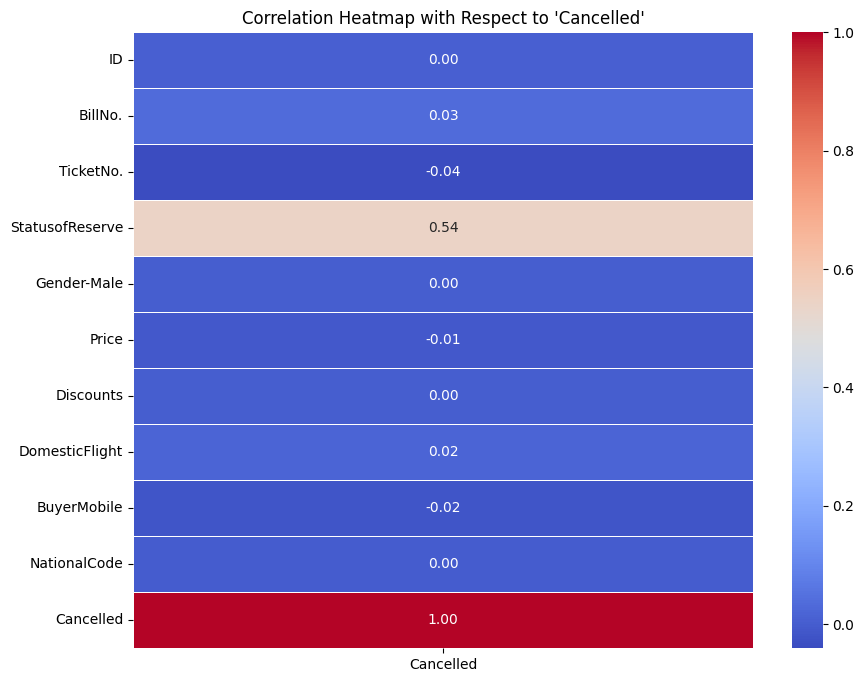

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
sns.heatmap(correlation_matrix[['Cancelled']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title
plt.title("Correlation Heatmap with Respect to 'Cancelled'")

# Display the plot
plt.show()


In [77]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Print correlation values with respect to 'Cancelled' column
correlation_with_cancelled = correlation_matrix['Cancelled']
print(correlation_with_cancelled)

ID                 0.004487
BillNo.            0.034888
TicketNo.         -0.040538
StatusofReserve    0.542035
Gender-Male        0.002793
Price             -0.011831
Discounts          0.000329
DomesticFlight     0.019573
BuyerMobile       -0.016486
NationalCode       0.000098
Cancelled          1.000000
Name: Cancelled, dtype: float64


### Dropping features that aren't much correlated

In [78]:
columns_to_drop = ['ID', "CityTo", "CityFrom", "TypeOfVehicle", "Discounts", "NationalCode", "Gender-Male", "Price"]
df.drop(columns_to_drop, axis=1, inplace=True)

### Checking for Duplicates and dropping them

In [79]:
# Count the number of duplicate rows
num_duplicate_rows = df.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of Duplicate Rows: {num_duplicate_rows}")

df.drop_duplicates(inplace=True)

# Verify that duplicate rows are dropped
print(f"Number of Duplicate Rows after Dropping: {df.duplicated().sum()}")
df.columns

Number of Duplicate Rows: 1
Number of Duplicate Rows after Dropping: 0


Index(['TimeOfCreation', 'TimeOfDeparture', 'BillNo.', 'TicketNo.',
       'StatusofReserve', 'DomesticFlight', 'ReasonForTrip', 'ModeOfTravel',
       'BuyerMobile', 'Cancelled'],
      dtype='object')

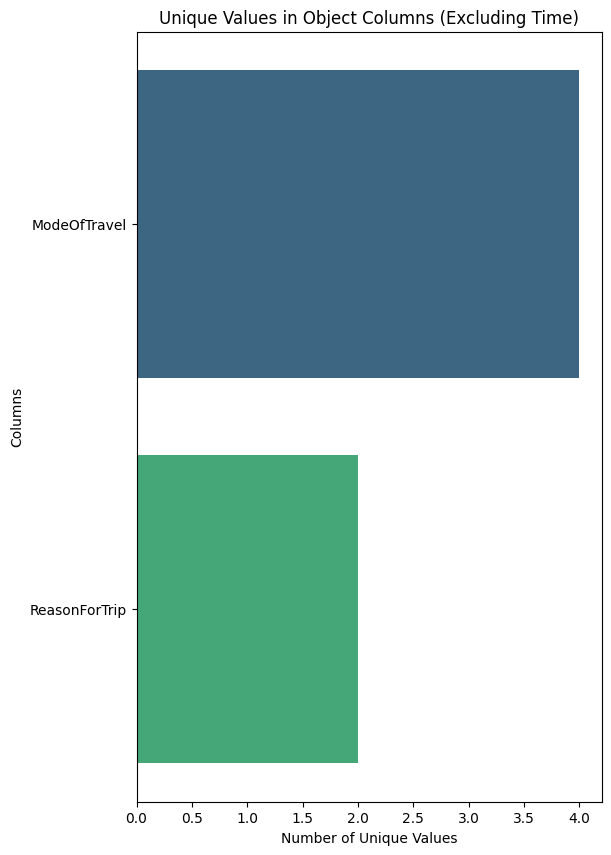

In [80]:
object_columns = df.select_dtypes(include=['object']).columns
# Exclude 'TimeOfCreation' and 'TimeOfDeparture'
object_columns = [col for col in object_columns if col not in ['TimeOfCreation', 'TimeOfDeparture']]

unique_value_counts = df[object_columns].nunique().sort_values(ascending=False)
plt.figure(figsize=(6, 10))  
sns.barplot(x=unique_value_counts.values, y=unique_value_counts.index, palette="viridis", orient="h")

plt.title("Unique Values in Object Columns (Excluding Time)")
plt.xlabel("Number of Unique Values")
plt.ylabel("Columns")

plt.savefig("unique_values_plot.png", bbox_inches="tight")
plt.show()

### Label Encoding categorical data



In [81]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate over the columns you want to label encode
columns_to_encode = [ 'ReasonForTrip', 'ModeOfTravel']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

df.columns

Index(['TimeOfCreation', 'TimeOfDeparture', 'BillNo.', 'TicketNo.',
       'StatusofReserve', 'DomesticFlight', 'ReasonForTrip', 'ModeOfTravel',
       'BuyerMobile', 'Cancelled'],
      dtype='object')

### Splitting Time Columns into seconds and extracting the time difference 

In [82]:
def calculate_days_difference(df):
    df['TimeOfCreation'] = (pd.to_datetime(df['TimeOfCreation']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    df['TimeOfDeparture'] = (pd.to_datetime(df['TimeOfDeparture']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    df["TimeDiff"] = df['TimeOfDeparture'] - df['TimeOfCreation']
    df = df.drop(['TimeOfCreation', 'TimeOfDeparture'], axis=1)
    return df

# Call the function with your DataFrame
df = calculate_days_difference(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70710 entries, 0 to 70710
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BillNo.          70710 non-null  int64  
 1   TicketNo.        70710 non-null  float64
 2   StatusofReserve  70710 non-null  int64  
 3   DomesticFlight   70710 non-null  int64  
 4   ReasonForTrip    70710 non-null  int64  
 5   ModeOfTravel     70710 non-null  int64  
 6   BuyerMobile      70710 non-null  int64  
 7   Cancelled        70710 non-null  int64  
 8   TimeDiff         70710 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 5.4 MB


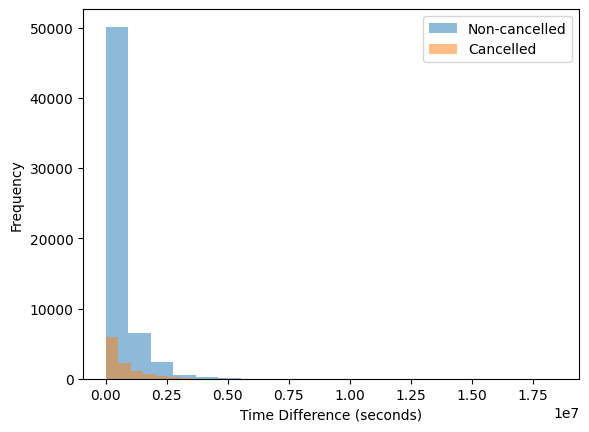

In [83]:
import matplotlib.pyplot as plt

# Filter the data for non-cancelled (Cancelled = 0)
non_cancelled = df[df['Cancelled'] == 0]

# Filter the data for cancelled (Cancelled = 1)
cancelled = df[df['Cancelled'] == 1]

# Create histograms for TimeDiff for non-cancelled and cancelled
plt.hist(non_cancelled['TimeDiff'], bins=20, alpha=0.5, label='Non-cancelled')
plt.hist(cancelled['TimeDiff'], bins=20, alpha=0.5, label='Cancelled')

plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


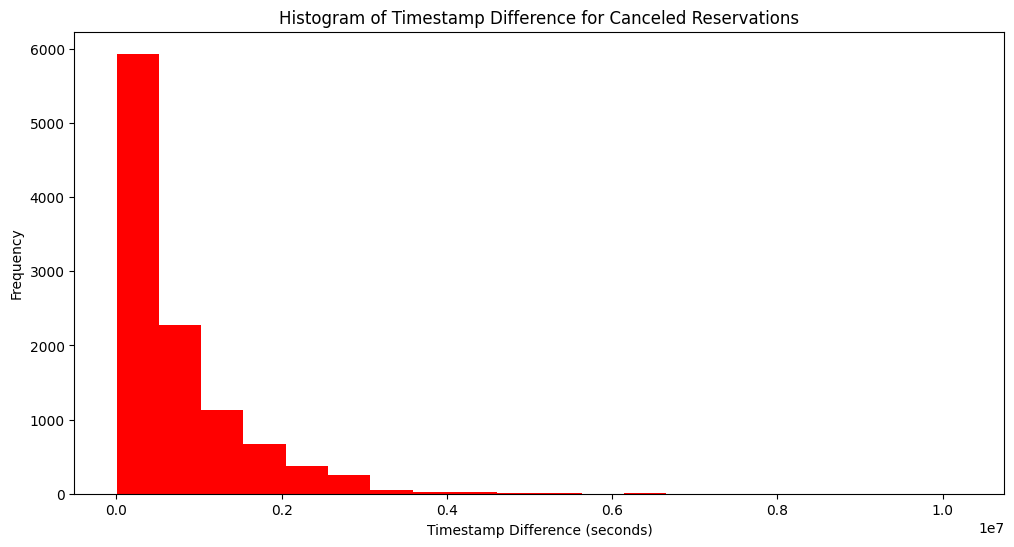

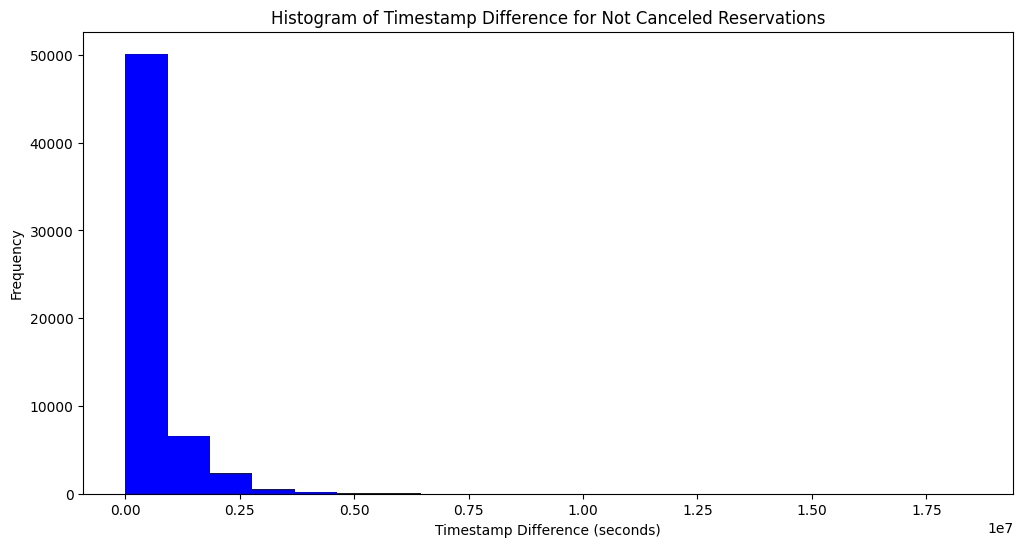

Histogram for Canceled Reservations:
Bin 1: 2129.0 - 513787.8, Count: 5934
Bin 2: 513787.8 - 1025446.6, Count: 2275
Bin 3: 1025446.6 - 1537105.4, Count: 1125
Bin 4: 1537105.4 - 2048764.2, Count: 677
Bin 5: 2048764.2 - 2560423.0, Count: 372
Bin 6: 2560423.0 - 3072081.8, Count: 249
Bin 7: 3072081.8 - 3583740.6, Count: 53
Bin 8: 3583740.6 - 4095399.4, Count: 24
Bin 9: 4095399.4 - 4607058.2, Count: 20
Bin 10: 4607058.2 - 5118717.0, Count: 7
Bin 11: 5118717.0 - 5630375.8, Count: 10
Bin 12: 5630375.8 - 6142034.6, Count: 0
Bin 13: 6142034.6 - 6653693.399999999, Count: 3
Bin 14: 6653693.399999999 - 7165352.2, Count: 1
Bin 15: 7165352.2 - 7677011.0, Count: 0
Bin 16: 7677011.0 - 8188669.8, Count: 0
Bin 17: 8188669.8 - 8700328.6, Count: 0
Bin 18: 8700328.6 - 9211987.4, Count: 0
Bin 19: 9211987.4 - 9723646.2, Count: 0
Bin 20: 9723646.2 - 10235305.0, Count: 1

Histogram for Not Canceled Reservations:
Bin 1: 1866.0 - 925422.85, Count: 50128
Bin 2: 925422.85 - 1848979.7, Count: 6576
Bin 3: 1848979.7 

In [84]:
import matplotlib.pyplot as plt

# Separate the dataset into two groups: canceled and not canceled
canceled_data = df[df['Cancelled'] == 1]
not_canceled_data = df[df['Cancelled'] == 0]

# Set the number of bins and other parameters as needed
num_bins = 20

# Create a separate histogram for 'timestamp_diff_seconds' for canceled reservations
plt.figure(figsize=(12, 6))
plt.hist(canceled_data['TimeDiff'], bins=num_bins, color='red')
plt.xlabel('Timestamp Difference (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Timestamp Difference for Canceled Reservations')
plt.show()

# Create a separate histogram for 'timestamp_diff_seconds' for not canceled reservations
plt.figure(figsize=(12, 6))
plt.hist(not_canceled_data['TimeDiff'], bins=num_bins, color='blue')
plt.xlabel('Timestamp Difference (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Timestamp Difference for Not Canceled Reservations')
plt.show()
import numpy as np

# Calculate histogram data for canceled reservations
hist_canceled, bin_edges_canceled = np.histogram(canceled_data['TimeDiff'], bins=num_bins)

# Calculate histogram data for not canceled reservations
hist_not_canceled, bin_edges_not_canceled = np.histogram(not_canceled_data['TimeDiff'], bins=num_bins)

# Print histogram data for canceled reservations
print("Histogram for Canceled Reservations:")
for i in range(len(bin_edges_canceled) - 1):
    print(f"Bin {i + 1}: {bin_edges_canceled[i]} - {bin_edges_canceled[i + 1]}, Count: {hist_canceled[i]}")

# Print histogram data for not canceled reservations
print("\nHistogram for Not Canceled Reservations:")
for i in range(len(bin_edges_not_canceled) - 1):
    print(f"Bin {i + 1}: {bin_edges_not_canceled[i]} - {bin_edges_not_canceled[i + 1]}, Count: {hist_not_canceled[i]}")


### Status of Reserve

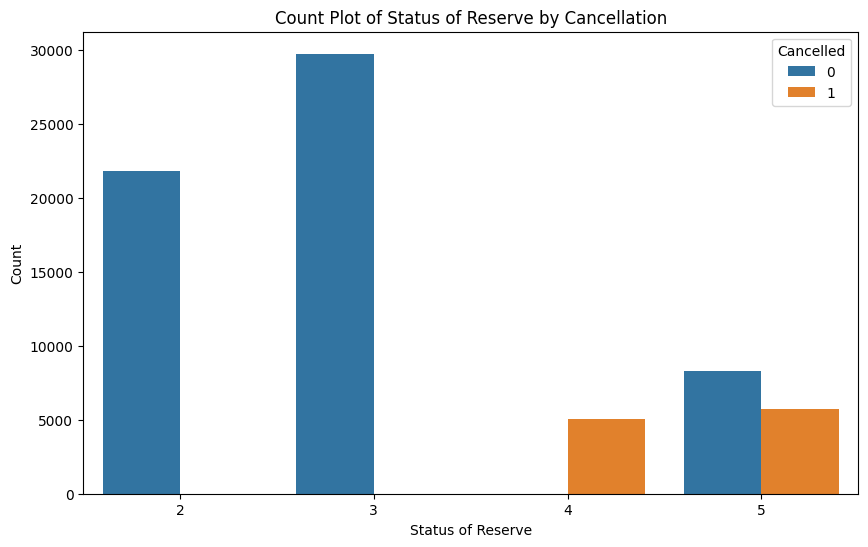

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='StatusofReserve', hue='Cancelled')
plt.title("Count Plot of Status of Reserve by Cancellation")
plt.xlabel("Status of Reserve")
plt.ylabel("Count")
plt.show()


In [86]:
# Assuming 'df' is your DataFrame containing the data
status_cancelled_counts = df.groupby(['StatusofReserve', 'Cancelled']).size().reset_index(name='Count')
print(status_cancelled_counts)


   StatusofReserve  Cancelled  Count
0                2          0  21858
1                3          0  29766
2                4          1   5027
3                5          0   8335
4                5          1   5724


### Visulaizing final Data

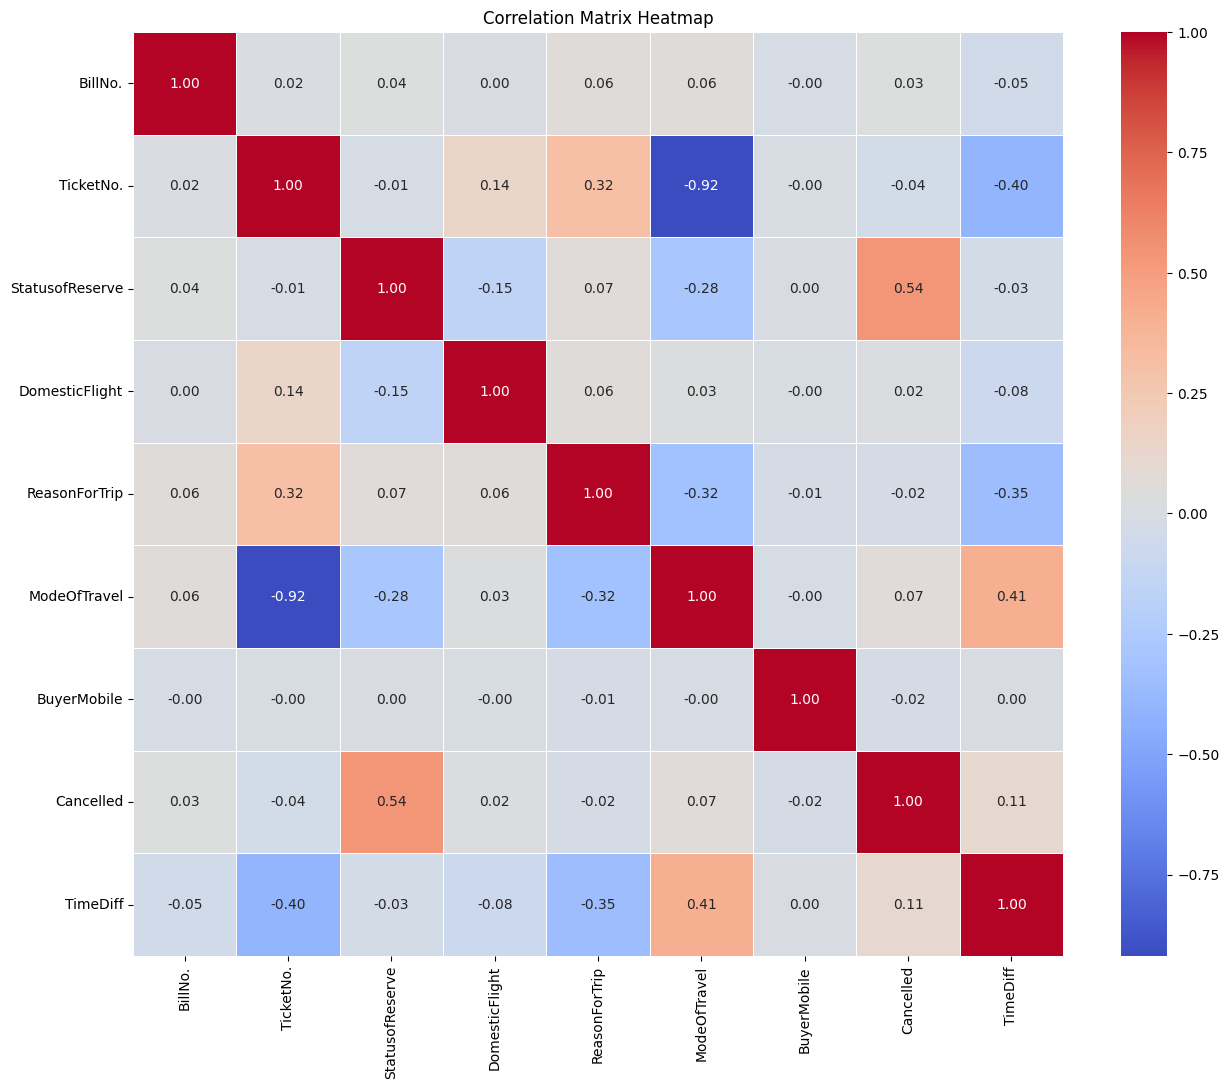

<class 'pandas.core.frame.DataFrame'>
Index: 70710 entries, 0 to 70710
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BillNo.          70710 non-null  int64  
 1   TicketNo.        70710 non-null  float64
 2   StatusofReserve  70710 non-null  int64  
 3   DomesticFlight   70710 non-null  int64  
 4   ReasonForTrip    70710 non-null  int64  
 5   ModeOfTravel     70710 non-null  int64  
 6   BuyerMobile      70710 non-null  int64  
 7   Cancelled        70710 non-null  int64  
 8   TimeDiff         70710 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 5.4 MB
None


In [87]:
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix Heatmap")
plt.show()
print(df.info())

### Spliting Train df and training our model

In [88]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

# Separate the target variable and features
y = df['Cancelled']
X = df.drop('Cancelled', axis=1)

# Initialize SimpleImputer with a strategy (fill missing values with the mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your data (X) to fill missing values if left any
X_imputed = imputer.fit_transform(X)

# Convert the result back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.1575, random_state=42)
# test_size=0.1575 gives best f1 and n_estimators=150
# Initialize and train multiple models
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=150, random_state=42)),
    ("XGBoost", XGBClassifier(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("LightGBM", LGBMClassifier(n_estimators=100, random_state=42)),
]
    
best_model = None
best_f1 = 0

### Iterate over all the models and select the best one
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"F1-Score: {f1}")
    print(f"Accuracy: {accuracy}")
    print("--------")

    if f1 > best_f1:
        best_f1 = f1
        best_model = model_name

print(f"The best model is: {best_model} with an F1-Score of {best_f1}")

# Assign the best model to the 'model' variable
model = None
for model_name, model_instance in models:
    if model_name == best_model:
        model = model_instance

Model: Random Forest
F1-Score: 0.9571037420139945
Accuracy: 0.9873394989674059
--------
Model: XGBoost
F1-Score: 0.939938080495356
Accuracy: 0.98258058723175
--------
Model: Gradient Boosting
F1-Score: 0.9340830990315526
Accuracy: 0.9810541438448415
--------
Model: LightGBM
F1-Score: 0.9359054138145613
Accuracy: 0.9815030977821676
--------
The best model is: Random Forest with an F1-Score of 0.9571037420139945


In [89]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd

# Separate the target variable and features
y = df['Cancelled']
X = df.drop('Cancelled', axis=1)

# Initialize SimpleImputer with a strategy (fill missing values with the mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your data (X) to fill missing values if left any
X_imputed = imputer.fit_transform(X)

# Convert the result back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.2, random_state=42)

# Initialize multiple models
random_forest = RandomForestClassifier(n_estimators=150, random_state=42)
xgboost = XGBClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
lightgbm = LGBMClassifier(n_estimators=100, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
svc = SVC(probability=True, random_state=42)

# Create a Voting Classifier with hard voting
hard_voting_clf = VotingClassifier(estimators=[
    ("Random Forest", random_forest),
    ("XGBoost", xgboost),
    ("Gradient Boosting", gradient_boosting),
    ("LightGBM", lightgbm),
    ("AdaBoost", adaboost),
    ("SVC", svc)
], voting='hard')

# Create a Voting Classifier with soft voting
soft_voting_clf = VotingClassifier(estimators=[
    ("Random Forest", random_forest),
    ("XGBoost", xgboost),
    ("Gradient Boosting", gradient_boosting),
    ("LightGBM", lightgbm),
    ("AdaBoost", adaboost),
    ("SVC", svc)
], voting='soft')

# Train both voting classifiers
hard_voting_clf.fit(X_train, y_train)
soft_voting_clf.fit(X_train, y_train)

# Make predictions
y_pred_hard = hard_voting_clf.predict(X_test)
y_pred_soft = soft_voting_clf.predict(X_test)

# Evaluate performance
f1_hard = f1_score(y_test, y_pred_hard)
accuracy_hard = accuracy_score(y_test, y_pred_hard)

f1_soft = f1_score(y_test, y_pred_soft)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

print("Hard Voting Classifier:")
print(f"F1-Score: {f1_hard}")
print(f"Accuracy: {accuracy_hard}")
print("--------")

print("Soft Voting Classifier:")
print(f"F1-Score: {f1_soft}")
print(f"Accuracy: {accuracy_soft}")


Hard Voting Classifier:
F1-Score: 0.9388741241845856
Accuracy: 0.9821100268703153
--------
Soft Voting Classifier:
F1-Score: 0.9396426846933849
Accuracy: 0.9823221609390468


### Applying same preprocessing to the Test Data

In [90]:
# reading the test dataset.
test_df = pd.read_csv("/kaggle/input/cancellation/test.csv", encoding="utf-8")

columns_to_encode = ['ReasonForTrip', 'ModeOfTravel']

for column in columns_to_encode:
    test_df[column] = label_encoder.fit_transform(test_df[column])
columns_to_drop = [  "CityTo", "CityFrom", "VehicleClass", "PassportNumberHashed", "EmailHashed", "UserID", "TypeOfVehicle","Discounts","NationalCode","Gender-Male","Price"]
test_df.drop(columns_to_drop, axis=1, inplace=True)

test_df = calculate_days_difference(test_df)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70710 entries, 0 to 70710
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BillNo.          70710 non-null  int64  
 1   TicketNo.        70710 non-null  float64
 2   StatusofReserve  70710 non-null  int64  
 3   DomesticFlight   70710 non-null  int64  
 4   ReasonForTrip    70710 non-null  int64  
 5   ModeOfTravel     70710 non-null  int64  
 6   BuyerMobile      70710 non-null  int64  
 7   Cancelled        70710 non-null  int64  
 8   TimeDiff         70710 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 5.4 MB


### Saving the output file prediciting on the test data

In [92]:
id_column = test_df['ID']
# Drop the 'ID' column from test_data_encoded
test_df = test_df.drop('ID', axis=1)
test_predictions = model.predict(test_df)

# Combine 'ID' column and predictions
submission = pd.DataFrame({'ID': id_column, 'Cancelled':  test_predictions})
submission.to_csv("rskc.csv", index=False)

In [93]:

# Generate probabilities on the test set (for soft voting)
test_probabilities = soft_voting_clf.predict_proba(X_test)[:, 1]

# Save the probabilities to a CSV file for soft voting
soft_submission_df = pd.DataFrame({'ID': X_test.index, 'Cancelled': test_probabilities})
soft_submission_df.to_csv('kaggle_submission_soft.csv', index=False)

In [94]:

# Generate predictions on the test set
test_predictions = hard_voting_clf.predict(X_test)

hard_submission_df = pd.DataFrame({'ID': X_test.index, 'Cancelled': test_probabilities})
hard_submission_df.to_csv('kaggle_submission_hard.csv', index=False)